In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

## Get information of data

In [4]:
builder=tfds.builder('rock_paper_scissors')
info=builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\rugve\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dat

## Prepare the data

In [5]:
ds_train = tfds.load(name="rock_paper_scissors",split="train")
ds_test = tfds.load(name="rock_paper_scissors",split="test")

## Show examples

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


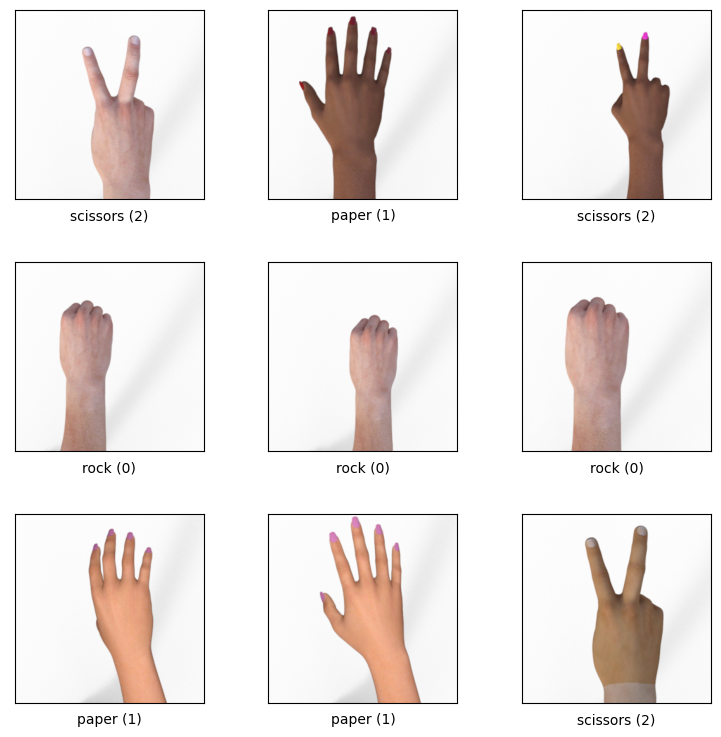

In [6]:
fig = tfds.show_examples(info,ds_test)

## Additional data prep


In [7]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [8]:
type(train_images[0])
train_images.shape

(2520, 300, 300)

In [9]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1) 

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

## Train a network

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, input_shape=(300,300,1), activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 44s 532ms/step - loss: 24.0439 - accuracy: 0.4071
Epoch 2/5
79/79 [==============================] - 40s 512ms/step - loss: 1.6684 - accuracy: 0.6171
Epoch 3/5
79/79 [==============================] - 40s 511ms/step - loss: 0.5381 - accuracy: 0.7960
Epoch 4/5
79/79 [==============================] - 40s 511ms/step - loss: 0.6184 - accuracy: 0.7829
Epoch 5/5
79/79 [==============================] - 42s 526ms/step - loss: 0.7129 - accuracy: 0.7643


## Train model with convolutional approach

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(64,3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32,3,activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=5,batch_size=32)

Epoch 1/5
40/79 [==============>...............] - ETA: 3:00 - loss: 27.4280 - accuracy: 0.3359

KeyboardInterrupt: 

## Over fitted above model of convolutional approach

## Better convlolutional network

In [25]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)),
    keras.layers.Conv2D(64,3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32,3,activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 46s 555ms/step - loss: 0.8836 - accuracy: 0.6321
Epoch 2/5
79/79 [==============================] - 42s 531ms/step - loss: 0.3528 - accuracy: 0.9004
Epoch 3/5
79/79 [==============================] - 43s 549ms/step - loss: 0.1618 - accuracy: 0.9643
Epoch 4/5
79/79 [==============================] - 42s 534ms/step - loss: 0.1030 - accuracy: 0.9734
Epoch 5/5
79/79 [==============================] - 43s 542ms/step - loss: 0.0750 - accuracy: 0.9802


In [26]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 2s 107ms/step - loss: 0.7514 - accuracy: 0.7285


[0.751377284526825, 0.7284946441650391]

In [27]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model=keras.Sequential()
    
    model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))
    
    model.add(keras.layers.Conv2D(64,3, activation='relu'))
    model.add(keras.layers.Conv2D(32,3,activation='relu'))
    
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(hp.Choice("Dense Layer",[64,128,256,512,1024]),activation='relu'))
    
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32
)

tuner.search(train_images,train_labels,validation_data=(test_images,test_labels), epochs=10,batch_size=32)

Trial 5 Complete [01h 59m 37s]
val_accuracy: 0.7231183052062988

Best val_accuracy So Far: 0.7446236610412598
Total elapsed time: 02h 42m 41s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit
